# Assignment 3
SIADS 521: Visual Explorations of Data

**Author**: Riccardo Ricci


# Choropleth Map + Geopandas

## Table of contents

<ol>
  <p>1. Visualization Technique: Choropleth Map</p>
  <p>2. Visualization Library: GeoPandas</p>
  <p>3. Demonstration: SIPRI Dataset</p>
  <p>4. Conclusion </p>

</ol>

## 1. Visualization Technique: *Choropleth Map*

*What is it?*
The Choropleth Map (from Greek χῶρος choros 'area/region' and πλῆθος plethos 'multitude') is a visualization technique that displays coloured, shaded or patterned maps based on a data variable ([The Data Visualization Catalogue](https://datavizcatalogue.com/methods/choropleth.html)). Each region of the map (e.g., counties, provinces, countries) is colored or shaded with the magnitude that depends on a data variable. Typically, this can be a blending from one color to another, a single hue progression, transparent to opaque, light to dark or an entire colour spectrum. The data variable can be of any data type: nominal, ordinal, interval, or ratio, although quantitative (interval/ratio) variables are more commonly used in choropleth maps ([Wikipedia](https://en.wikipedia.org/wiki/Choropleth_map#:~:text=A%20choropleth%20map%20(from%20Greek,density%20or%20per%2Dcapita%20income) \).

<img src="Carte_figurative_de_l'instruction_populaire_de_la_France.jpg" alt="drawing" width="400"/>
<center>Figure 1. A classic example of a choropleth map: Dupin's 1826 map of literacy in France</center>

    
*When to use it?*
Use choropleth maps when you want to compare geographical locations (e.g. US states) based on a data variable, typically numeric. Remember also to normalize data (e.g. military expenditure normalized by the population) if you do not want to see biased data.

*Advantages*
- By using a color of different intensity, the choropleth map stimulates the preattentive processing and therefore can convey immediate stories (e.g. the region with the highest and lowest magnitude of a data variable)
- Visual appeal and accessibility thanks to the use of geographical locations. People recognize better geographical locations and color

*Disadvantages*

- Difficult to read and compare values across map regions
- Regions with large size seems to be more important due to size effects

*What visualization techniques are similar?* The choropleth map is close to a heat map. The main difference is the colored or shaded area. In choropleth maps, each area is a priori geographical location (Trame & Keßler, 2011). In heat maps, the area is typically a rectangle whose position is defined by the variable encoded in the x and y axes.

*Classified Map vs Unclassified Map*. The classified map uses classes of the same color defined with a classification rule. There are different classification rules that can be applied (e.g. equal intervals, quantiles, Fisher Jenks etc. for a review see [Wikipedia](https://en.wikipedia.org/wiki/Choropleth_map#:~:text=A%20choropleth%20map%20(from%20Greek,density%20or%20per%2Dcapita%20income.) \). The unclassified map does not use any classifications because values range on a continuous scale. The advantage of the classified map is the reduction of the cognitive effort on readers. The advantage of unclassified map is that they allow to see raw data values and allow to spot subtle differences. Readers are not misleaded to think that regions with the same class have identical values (Tobler, 1973).

### Classified Map
<img src="classified_map_example.png" alt="drawing" width="500"/>
<center>Figure 2. A classifed map example </center>


### Unclassified Map
<img src="unclassified_map_example.png" alt="drawing" width="400"/>
<center>Figure 3. A unclassifed map example </center>


## 2. Visualization Library: *GeoPandas* <img src="geopandas_logo.png" alt="drawing" width="200" align = 'right'/>

I used the open source GeoPandas library (check [here](https://geopandas.org/en/stable/) the documentation) to plot a choropleth map. I opted for this library because of its simplicity as it is based upon pandas and matplotlib. Table 1 provides the complete set of foundational libraries. The first two libraries should be familiar to many of us. Indeed, GeoPandas has lower learning barriers!

|Library | Functionality used in GeoPandas|
|--------|--------------------------------|
|Pandas| data manipulation |
|Matplotlib | plotting|
|Shapely | geometric operations |
|Fiona | file access |
|Pyproj | projection of geospatial coordinates from one <br /> coordinate reference system (CRS) to another |
|Map Classify | build intervals in classification maps |

<center> Table 1. GeoPandas foundational libraries</center> 

Geopandas was founded in 2013 by Kelsey Jordahl during the SciPy conference and released one year later. From 2020, it is one of the BSD-license open source projects sponsored by the [NumFOCUS Affiliated Project](https://numfocus.org/).
    
Figure 4 shows how GeoPandas extends the capabilities of the Pandas library by including an additional data type called **geometry** (points, polygons etc.). We can call the dataframe object a *geodataframe* to highlight the inclusion of geospatial data in pandas dataframes. You can have as many columns with geometries as you wish but only is active. 

<img src="geodataframe.png" alt="drawing" width="400"/>
<center>Figure 4. Geodataframe </center>

Geopandas has three basic classes of geometric objects (which are shapely objects):

- Points / Multi-Points

- Lines / Multi-Lines

- Polygons / Multi-Polygons

Spatial operations(or geometric manipulations) with geometry columns include getting an area, finding a polygon boundary and a centroid, finding the distance from a centroid (check the documentation [here](https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html) for the full set of geometric manipulations).

The [plotting](https://geopandas.org/en/stable/docs/user_guide/mapping.html) is based on matplotlib and works similarly. The two most used methods are ```.plot()``` and ```.explore()```. The second method allows building interactive plots. As it is based on matplotlib, geopandas is a **procedural language** in which you have to specify the exact steps of plotting.

*Limitations* 

The geopandas seems not work well when you need to create powerful interactive maps and when working with large datasets though with new releases the community seems to improve the library over these two aspects.

*How to install geopandas?*

As suggested in the documentation, the best way to install geopand is using Anaconda. This ensures that all GeoPandas foundational libraries (e.g. fiona, shapely) are installed. After having downloaded the Anacoda distribution, open the conda terminal and type

```conda install geopandas```


## 3. Demonstration: *SIPRI Dataset*

In this walkthrough of how to plot chropleth map using the geopandas library, I will use a database containing the timeseries of military expenditure for the period 1949–2020 provided by the **Stockholm International Peace Research Institute** ([SIPRI](https://sipri.org/about)). The documentation of this dataset can be found [here](https://sipri.org/databases/milex).
First, let's import all the necessary libraries: pandas, geopandas, numpy and ipywidget. This last library will be used to create a time slider.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from ipywidgets import widgets
import panel as pn

To plot a choropeth map, one way to proceed is to have both the data variables and the geometric variables (e.g. GeoPackage, GeoJSON, Shapefile) in the same geodataframe.

You should have at the least the 10.2 version of geopandas. Let's check that...

In [2]:
gpd.__version__ 

'0.10.2'

Ok, I have the correct version of the library installed. 

### 3.1 Data Cleaning

Next, I will import from the SIPRI website the dataset and select to import the sheet *Per Capita*. Let's also consider as columns only the country names and years from 2010 to 2020 and setting country names as the dataframe index. Let's also set to null some values which refer to incomplete data 
". ." = data unavailable. "xxx" = country did not exist or was not independent during all or part of the year in question.

I finally convert the years columns from object to float, drop null rows ("continent rows" e.g. Europe) and sort the dataframe by country name.

In [3]:
#path = 'https://sipri.org/sites/default/files/SIPRI-Milex-data-1949-2020_0.xlsx'
milex = pd.read_excel('SIPRI-Milex-data-1949-2020_0.xlsx', sheet_name='Per capita', skiprows=6, skipfooter=7)
milex = milex[['Country', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]]
milex = milex.set_index('Country')
milex.columns = [str(year) for year in milex.columns] ## e.g. 2010 --> '2010'

for col in milex.columns:
    milex[milex[col] == '. .'] = np.nan
    milex[milex[col] == 'xxx'] = np.nan
    
milex = milex.astype('float').dropna().sort_values(by = 'Country')

Let's have a look at the military expenditure dataframe. Values are in US$ as of 2019

In [4]:
milex.head(10)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,
Afghanistan,10.215578,10.817895,7.656381,6.730612,8.037777,5.797667,5.253318,5.273488,5.328611,5.936520,7.181836
Albania,63.056789,67.269932,62.868557,61.993337,61.499133,45.787777,45.333959,50.060412,61.013825,68.459517,77.150146
Algeria,157.635101,236.003755,249.473367,266.427695,249.831927,262.099999,251.953871,243.381615,226.949657,239.323338,221.392167
Angola,149.886873,150.264129,165.072775,234.117535,254.112798,129.402164,95.832770,102.723166,64.382586,46.219164,30.231434
Argentina,84.980672,98.061021,109.285051,121.764389,116.785501,127.279484,103.649905,124.260325,86.626527,69.955509,64.324270
Armenia,137.284811,135.882685,131.948732,153.421084,157.192196,152.921137,146.925961,150.642512,173.881118,220.439532,213.942065
Australia,1047.981080,1180.104548,1144.631372,1067.527694,1092.695509,1004.751149,1087.386654,1126.359226,1077.984416,1034.763296,1079.857407
Austria,382.683980,403.350187,374.869587,377.395250,383.642555,307.122025,329.924137,357.500415,381.041061,361.558642,399.895475
Azerbaijan,163.477936,336.758333,350.375967,358.807309,360.542643,301.426733,143.484308,155.288016,168.065757,184.542909,220.704811


In [5]:
pn.extension()
Country_Selection = pn.widgets.MultiSelect(name='MultiSelect', value=['Italy','Germany','UK','France', 'Spain'],
    options=list(milex.index), size=8)

Country_Selection

MultiSelect(options=['Afghanistan', ...], size=8, value=['Italy', 'Germany', ...])

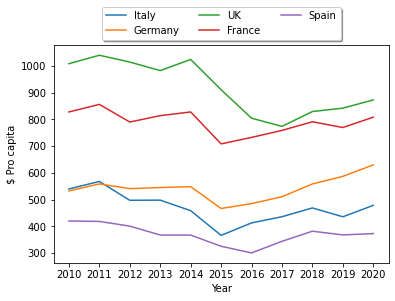

In [6]:
milexT = milex.T.reset_index()
plt.

for country in Country_Selection.value:
    figure = plt.plot(milexT['index'], milexT[country])

plt.xlabel('Year')
plt.ylabel('$ Pro capita')
plt.legend(Country_Selection.value, loc='upper center', bbox_to_anchor=(0.5, 1.20),
              ncol=3, fancybox=True, shadow=True)

Next, I am going to retrieve from the website https://www.iban.com/country-codes the list of country names and their 3-digit ISO code. The ISO country codes will be needed in the following when the military expenditure will be joined with the geodataframe

In [7]:
iso_code = pd.read_html('https://www.iban.com/country-codes')
iso_code = iso_code[0]
iso_code = iso_code[['Country','Alpha-3 code']]
iso_code = iso_code.set_index('Country')
iso_code = iso_code.rename({'Alpha-3 code':'code'}, axis = 'columns')
iso_code.head()

,code
Country,
Afghanistan,AFG
Åland Islands,ALA
Albania,ALB
Algeria,DZA
American Samoa,ASM


Now, I am joining the military expenditure dataset with the iso_code dataset on country names which are set as index in both dataframes (see the arguments ```left_index=True, right_index=True```)

In [8]:
milexiso = milex.merge(iso_code, how = 'left', left_index=True, right_index=True) 
milexiso.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,code
Country,,,,,,,,,,,,
Afghanistan,10.215578,10.817895,7.656381,6.730612,8.037777,5.797667,5.253318,5.273488,5.328611,5.936520,7.181836,AFG
Albania,63.056789,67.269932,62.868557,61.993337,61.499133,45.787777,45.333959,50.060412,61.013825,68.459517,77.150146,ALB
Algeria,157.635101,236.003755,249.473367,266.427695,249.831927,262.099999,251.953871,243.381615,226.949657,239.323338,221.392167,DZA
Angola,149.886873,150.264129,165.072775,234.117535,254.112798,129.402164,95.832770,102.723166,64.382586,46.219164,30.231434,AGO
Argentina,84.980672,98.061021,109.285051,121.764389,116.785501,127.279484,103.649905,124.260325,86.626527,69.955509,64.324270,ARG


Unfortunately, some country names were different between the military expenditure and iso code dataframes (e.g. Bosnia and Herzegovina	vs Bosnia-Herzegovina) and did not find a joining match. Therefore, I manually set the iso_code to a bunch of countries

In [9]:
milexiso.loc['Bosnia-Herzegovina', 'code'] = 'BIH'
milexiso.loc['Bolivia', 'code'] = 'BOL'
milexiso.loc['Brunei', 'code'] = 'BRN'
milexiso.loc['Cape Verde', 'code'] = 'CPV'
milexiso.loc['Congo, Dem. Rep.', 'code'] = 'COD'
milexiso.loc['Côte d’Ivoire', 'code'] = 'CIV'
milexiso.loc['Dominican Rep.', 'code'] = 'DOM'
milexiso.loc['Iran', 'code'] = 'IRN'
milexiso.loc['Korea, South', 'code'] = 'KOR'
milexiso.loc['Kosovo', 'code'] = 'KOS'
milexiso.loc['Moldova', 'code'] = 'MDA'
milexiso.loc['Netherlands', 'code'] = 'NLD'
milexiso.loc['North Macedonia', 'code'] = 'MKD'
milexiso.loc['Philippines', 'code'] = 'PHL'
milexiso.loc['Russia', 'code'] = 'RUS'
milexiso.loc['Taiwan', 'code'] = 'TW'
milexiso.loc['Tanzania', 'code'] = 'TZA'
milexiso.loc['Trinidad & Tobago', 'code'] = 'TTO'
milexiso.loc['UK', 'code'] = 'GBR'
milexiso.loc['USA', 'code'] = 'USA'
milexiso.loc['eSwatini', 'code'] = 'SWZ'

Let's change the index to the iso country code

In [10]:
milexiso = milexiso.reset_index().set_index('code')

In [11]:
milexiso.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
code,,,,,,,,,,,,
AFG,Afghanistan,10.215578,10.817895,7.656381,6.730612,8.037777,5.797667,5.253318,5.273488,5.328611,5.936520,7.181836
ALB,Albania,63.056789,67.269932,62.868557,61.993337,61.499133,45.787777,45.333959,50.060412,61.013825,68.459517,77.150146
DZA,Algeria,157.635101,236.003755,249.473367,266.427695,249.831927,262.099999,251.953871,243.381615,226.949657,239.323338,221.392167
AGO,Angola,149.886873,150.264129,165.072775,234.117535,254.112798,129.402164,95.832770,102.723166,64.382586,46.219164,30.231434
ARG,Argentina,84.980672,98.061021,109.285051,121.764389,116.785501,127.279484,103.649905,124.260325,86.626527,69.955509,64.324270


The next step is reading the geopandas dataframwe containing the geometries of each country. To make things simple, I use the naturalearth_lowres dataset available in the [documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.datasets.available.html). This geodataframe contains the geometries of all countries and the 3-digit iso country codes. In the following, I read this file and set the index to the country name column. Some iso codes were set to '-99' (e.g. Norway). I manually changed them to the correct iso codes.

In [12]:
path_to_data = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(path_to_data)

gdf = gdf.set_index('name')
gdf.loc['Norway','iso_a3'] = 'NOR'
gdf.loc['France','iso_a3'] = 'FRA'
gdf.loc['N. Cyprus','iso_a3'] = 'CYP'
gdf.loc['Somaliland','iso_a3'] = 'SOM'
gdf.loc['Kosovo','iso_a3'] = 'KOS'
gdf = gdf.reset_index()
gdf = gdf.set_index('iso_a3')
gdf.sample(5)

,name,pop_est,continent,gdp_md_est,geometry
iso_a3,,,,,
GRL,Greenland,57713,North America,2173.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
KOS,Kosovo,1895250,Europe,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
GNQ,Eq. Guinea,778358,Africa,31770.0,"POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1..."
TTO,Trinidad and Tobago,1218208,North America,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
ARE,United Arab Emirates,6072475,Asia,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."


As you can see below, the gdf is not a pandas dataframe but a geopandas dataframe.

In [13]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

However, the data manipulations available for pandas are the same for geopandas dataframes like the joining function. Next, I join the milexiso pandas dataframe with gdf geopandas dataframe on the dataframes indexes

In [14]:
milex_final = milexiso.merge(gdf, how = 'outer', left_index=True, right_index=True)

In [15]:
type(milex_final)

pandas.core.frame.DataFrame

The resulting is a pandas dataframe. Let's convert it to a geodataframe in order to plot in the following

In [16]:
milex_final = gpd.GeoDataFrame(milex_final)
milex_final = milex_final.drop('name', axis = 1)
milex_final.head(5)

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,pop_est,continent,gdp_md_est,geometry
AFG,Afghanistan,10.215578,10.817895,7.656381,6.730612,8.037777,5.797667,5.253318,5.273488,5.328611,5.936520,7.181836,34124811.0,Asia,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
AGO,Angola,149.886873,150.264129,165.072775,234.117535,254.112798,129.402164,95.832770,102.723166,64.382586,46.219164,30.231434,29310273.0,Africa,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
ALB,Albania,63.056789,67.269932,62.868557,61.993337,61.499133,45.787777,45.333959,50.060412,61.013825,68.459517,77.150146,3047987.0,Europe,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6072475.0,Asia,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
ARG,Argentina,84.980672,98.061021,109.285051,121.764389,116.785501,127.279484,103.649905,124.260325,86.626527,69.955509,64.324270,44293293.0,South America,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [17]:
type(milex_final)

geopandas.geodataframe.GeoDataFrame

### 3.2 Plotting a static choropleth map with a time slider

We are now **ready to build the choropleth map with a time slider.** To put a time slider (years = 2010, 2011, ... 2020) I use the interactive widget IntSlider. I first define the function that will be triggered each time the slider is changed with the selection of the year. The default value is 2010. I color with white those countries with missing or not available data. I opted for a unclassified map because it encodes raw data values.

In [18]:
def plot(year):
    fig, ax = plt.subplots(1, figsize = (15,12))
    milex_final.plot(column = str(year), ax = ax,
                cmap='Reds', linewidth=0.8,
                missing_kwds = dict(color='white', label='No Data'),
                legend = True,
                edgecolor='0.8',
                legend_kwds={'label': "Military Expenditure $ pro Capita",
                        'orientation': "horizontal"})    
    ax.axis('off')
    ax.set_title('Military Expenditure $ per capita (' + str(year) + ')', fontdict={'fontsize': '25', 'fontweight' : '3'})
    plt.show()

In [19]:
years = [year for year in range(2010,2021)]

interactive(plot, year = widgets.IntSlider(
    value=2010,
    min=min(years),
    max=max(years),
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))


interactive(children=(IntSlider(value=2010, continuous_update=False, description='Year:', max=2020, min=2010),…

### 3.3 Plotting an interactive Choropleth Map

In the following, I propose an interactive plot based on geopands ```.explore()``` function. The interactive widget seems not to working with ```.explore()```. Thus, I set the data fixed to 2020 but allowing the user to interact. When the reader hovers over a country shows the values for the other years as well. It would be great to show inside the legend a line plot showing the trend for each country. I surfed the internet but it does not seem to possibile. This is an interesting area for further research.

**Note**: After a couple of hours of debugging I realized that there is a requirement for geopandas to use column name with the string data type. I had integer column names and required me to change them to string types (more information on this can be found on [Stackoverflow](https://stackoverflow.com/questions/70759514/how-to-show-geopandas-interactive-map-with-explore).

In [20]:
year = '2020'

milex_final.dropna().explore(column = year,
                cmap='Reds',
                legend = True)

**Insights**

The choropleth map shows that **USA**, **Saudi Ariabia** and **Oman** were the countries with the highest military expenditure pro-capita over the period 2010-2020. **Australia** and **Norway** place immediately after these countries. A third group of countries with moderate military expenditure are **UK, France, Germany, Netherlands, Italy, Greece, Russia, Denmark, Sweden, Finland and South Korea**. As stated in the section 2, while the overall differences among countries are easy to recognize thanks to the use of colors, it is hard to determine the differences in values (e.g. between Germany and Italy)

## 4. Conclusion

The geopandas library can be used to build **choropleth maps** with both classified and unclassified maps. Use this library when you have geographical spatial data (e.g. countries, cities, boroughs) and you want to highlight differences among these locations based on one data variable. The library can be also used to create **bubble maps** (by varying the centroid size), **dot maps** (again using centroids) and *connection maps* (by drawing arrows of diffrent size among centroids).

**Author**: Riccardo Ricci

Source code of this tutorial can be found in [GitHub]

## Bibliography

- Kelsey Jordahl, Joris Van den Bossche, Martin Fleischmann, Jacob Wasserman, James McBride, Jeffrey Gerard, … François Leblanc. (2020, July 15). geopandas/geopandas: v0.8.1 (Version v0.8.1). Zenodo. http://doi.org/10.5281/zenodo.3946761
- SIPRI Stockholm International Peace Research Institute https://sipri.org/
- The Data Visualization Catalogue: Choropleth Maps - https://datavizcatalogue.com/methods/choropleth.html - accessed on 19th March 2022
- Trame, J., & Keßler, C. (2011). Exploring the lineage of volunteered geographic information with heat maps. GeoViz, Hamburg, Germany.
- Tobler, W. R. (1973). Choropleth maps without class intervals?. Geographical analysis, 5(3), 262-265.
